# Suavização Exponencial Simples - Estudos Part23 Séries Temporais

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6

In [3]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
data = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], index_col='Month', date_parser=dateparse)

C:\estudos_coleta_dados\virtualenv\estudos_dados\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


In [4]:
# importando o modulo de suavização exponencial
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [5]:
# Suavização exponencial
fit1 = SimpleExpSmoothing(data).fit(smoothing_level=0.2, optimized=False)
fcast1 = fit1.forecast(12).rename(r'$aplha=0.2$')

C:\estudos_coleta_dados\virtualenv\estudos_dados\lib\site-packages\statsmodels\tsa\base\tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<AxesSubplot:xlabel='Month'>

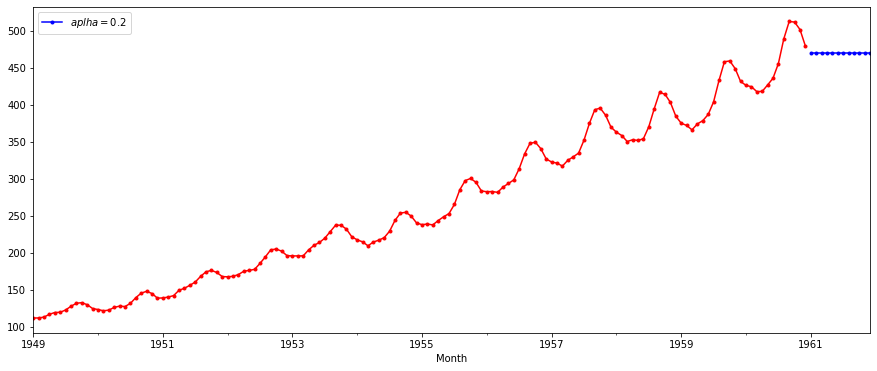

In [8]:
fcast1.plot(marker='.', color='blue', legend=True)
fit1.fittedvalues.plot(marker='.', color='red')

C:\estudos_coleta_dados\virtualenv\estudos_dados\lib\site-packages\statsmodels\tsa\base\tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<AxesSubplot:xlabel='Month'>

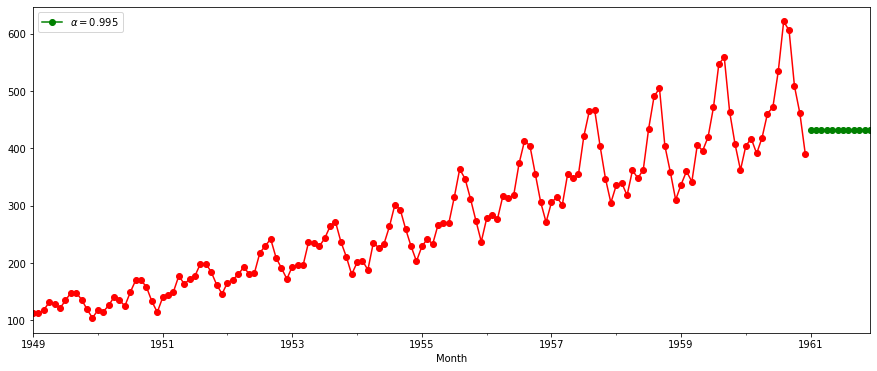

In [9]:
# otimizando o alpha
fit3 = SimpleExpSmoothing(data).fit()
fcast3 = fit3.forecast(12).rename(r'$\alpha=%s$'%fit3.model.params['smoothing_level'])

fcast3.plot(marker='o', color='green', legend=True)
fit3.fittedvalues.plot(marker='o', color='red')